In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

Loading a CSV file and drop only non-numeric column

In [35]:
X = pd.read_csv('C:/Users/Lenovo/OneDrive/Desktop/Ml_assignment_121ad0001/121ad0005_datasetML.csv')
X = X.select_dtypes(include=[np.number])
X.fillna(X.mean(), inplace=True) #fill missing values

Normalize data (min-max scaling)

<Axes: >

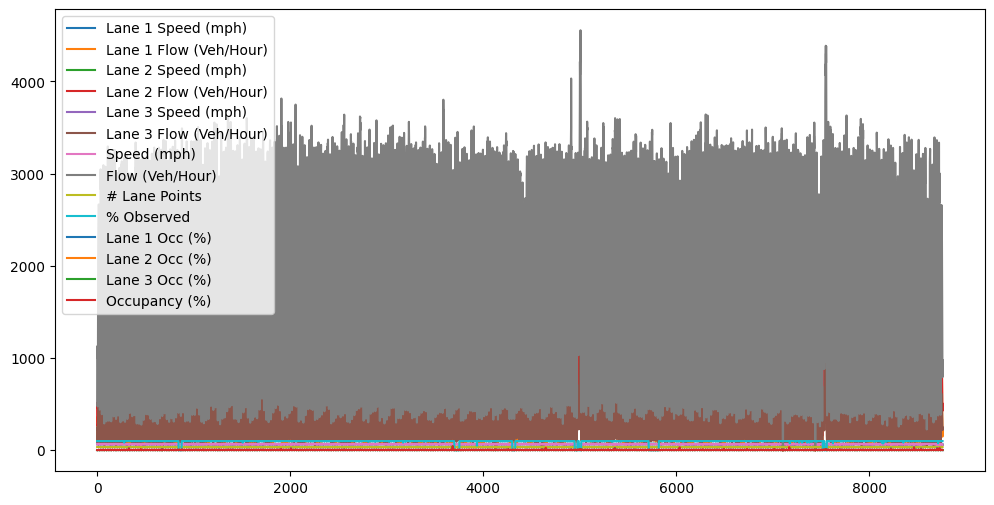

In [36]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)
X.plot(figsize=(12,6))

Sequence creation

In [37]:
def create_sequences(X, seq_length):
    X1, Y1 = [], []
    for i in range(len(X) - seq_length):
        X1.append(X[i:i+seq_length])
        Y1.append(X[i+seq_length])
    return np.array(X1), np.array(Y1)

SEQ_LENGTH = 10
X1 , Y1 = create_sequences(scaled_data, SEQ_LENGTH)

# Create and configure Model

In [38]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(SEQ_LENGTH, len(X.columns))))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(len(X.columns)))
model.compile(optimizer='adam', loss='mse')

Splitting data

In [39]:
train_size = int(len(X1) * 0.8)
X_train, X_test = X1[:train_size], X1[train_size:]
Y_train, Y_test = Y1[:train_size], Y1[train_size:]

## Train the model

In [40]:
model.fit(X_train, Y_train, epochs=4, batch_size=16, validation_data=(X_test, Y_test))
predictions = model.predict(X_test)
y_pred = model.predict(X_test)

Epoch 1/4
438/438 [==============================] - 10s 12ms/step - loss: 0.0163 - val_loss: 0.0040
Epoch 2/4
438/438 [==============================] - 4s 9ms/step - loss: 0.0028 - val_loss: 0.0034
Epoch 3/4
438/438 [==============================] - 4s 10ms/step - loss: 0.0024 - val_loss: 0.0029
Epoch 4/4
55/55 [==============================] - 0s 7ms/step


Inverse the normalisation

In [41]:
real_preds = scale.inverse_transform(predictions)
real_test = scale.inverse_transform(Y_test)

MSE & RMSE

In [42]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(real_test, real_preds)
rmse = np.sqrt(mse)

Plot the result

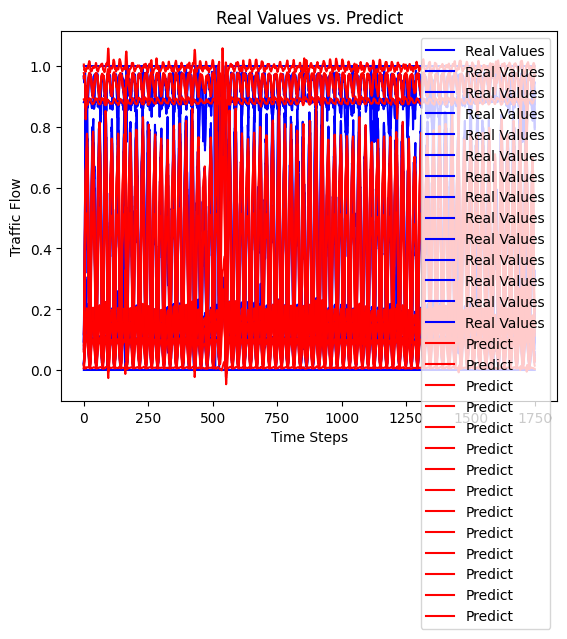

In [43]:
plt.plot(Y_test, label='Real Values', color='blue')
plt.plot(y_pred, label='Predict', color='red')
plt.legend()
plt.xlabel('Time Steps')
plt.ylabel('Traffic Flow')
plt.title('Real Values vs. Predict')
plt.show()

In [44]:
print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 4728.3081761688245
Root Mean Squared Error: 68.7626946546514
